In [324]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from keras.utils import to_categorical

In [325]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [326]:
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [327]:
print(X_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


In [328]:
num = 9
images = X_train[:num]
labels = y_train[:num]

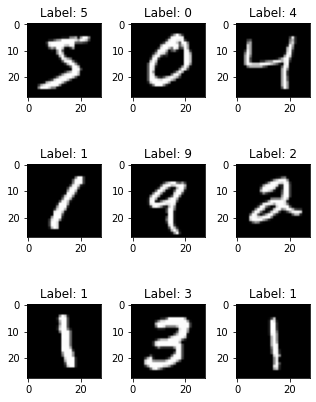

In [329]:
num_row = 3
num_col = 3
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [330]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [331]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [332]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000, 10) (10000, 10)


In [333]:
X_train = X_train.astype('float32')
X_train = X_train/255.0

X_test = X_test.astype('float32')
X_test = X_test/255.0

In [334]:
print(X_train.shape, y_train.shape)

(60000, 28, 28, 1) (60000, 10)


In [335]:
cnn = tf.keras.models.Sequential()

In [336]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[28,28,1]))

In [337]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [338]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [339]:
cnn.add(tf.keras.layers.Flatten())

In [340]:
cnn.add(tf.keras.layers.Dense(units=100, activation='relu'))

In [341]:
cnn.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))

In [342]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [343]:
cnn.fit(x = X_train, y = y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32,  verbose=1)

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1535 - accuracy: 0.9534 - val_loss: 0.0531 - val_accuracy: 0.9817
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0510 - accuracy: 0.9847 - val_loss: 0.0447 - val_accuracy: 0.9846
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0356 - accuracy: 0.9889 - val_loss: 0.0323 - val_accuracy: 0.9892
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0268 - accuracy: 0.9911 - val_loss: 0.0296 - val_accuracy: 0.9898
Epoch 5/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0201 - accuracy: 0.9936 - val_loss: 0.0279 - val_accuracy: 0.9902


In [344]:
cnn.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 800)               0         
                                                                 
 dense_23 (Dense)            (None, 100)             

In [345]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(cnn.predict(X_test), axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

print(cm)

313/313 [==============================] - 1s 4ms/step
[[ 974    0    1    0    0    0    1    1    3    0]
 [   0 1127    0    1    0    0    1    4    2    0]
 [   2    0 1022    2    0    0    0    5    1    0]
 [   2    0    0 1003    0    3    0    0    2    0]
 [   0    0    0    0  979    0    1    0    1    1]
 [   2    0    0    5    0  882    1    1    1    0]
 [   3    3    0    0    2    3  946    0    1    0]
 [   0    1    4    0    0    0    0 1022    1    0]
 [   4    0    1    1    0    0    1    1  965    1]
 [   1    2    0    2   10    6    0    3    3  982]]
